In [27]:
import tensorflow
tensorflow.test.gpu_device_name()

'/device:GPU:0'

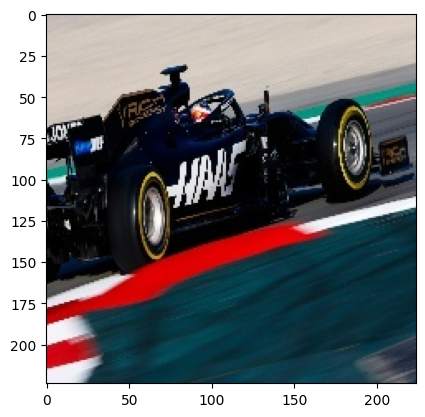

In [28]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('/kaggle/input/dataset-fsi-1/dataSetFSI/train/formula 1 racing/003.jpg', 'r')


imshow(np.asarray(pil_im))

In [29]:

from tensorflow.keras import backend as K
from time import time

# DATA SOURCE --------------------------------------------------

train_data_dir = '/kaggle/input/dataset-fsi-1/dataSetFSI/train'
validation_data_dir = '/kaggle/input/dataset-fsi-1/dataSetFSI/valid'
test_data_dir = '/kaggle/input/dataset-fsi-1/dataSetFSI/test'
image_size = (224, 224)
batch_size = 28

In [30]:
train_ds = tensorflow.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    #validation_split=0.2,
    #subset="training",
    #seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)

validation_ds = tensorflow.keras.preprocessing.image_dataset_from_directory(
    validation_data_dir,
    #validation_split=0.2,
    #subset="validation",
    #seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)

test_ds = tensorflow.keras.preprocessing.image_dataset_from_directory(
    test_data_dir,
    #validation_split=0.2,
    #subset="validation",
    #seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)

train_ds = train_ds.prefetch(buffer_size=32)
validation_ds = validation_ds.prefetch(buffer_size=32)
test_ds = test_ds.prefetch(buffer_size=32)

Found 1090 files belonging to 7 classes.
Found 70 files belonging to 7 classes.
Found 70 files belonging to 7 classes.


# **Image Augmentation**

In [31]:
#from tensorflow.keras.preprocessing.image import ImageDataGenerator

#train_datagen = ImageDataGenerator(
#        rescale=1./255,
#        rotation_range=15,
#        zoom_range=0.1
#)

#validation_datagen = ImageDataGenerator(
#        rescale=1./255
#)


#train_ds_augmentation = train_datagen.flow_from_directory(
#    train_data_dir,
#    #validation_split=0.2,
#    #subset="training",
#    #seed=1337,
#    target_size=image_size,
#    batch_size=batch_size,
#    class_mode='categorical'
#)

#validation_ds_augmentation = validation_datagen.flow_from_directory(
#    validation_data_dir,
#    validation_split=0.2,
 #   subset="validation",
  #  seed=1337,
   # target_size=image_size,
   # batch_size=batch_size,
   # class_mode='categorical'
#)



# **The Model**

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Rescaling                    

# MODEL --------------------------------------------------

model = Sequential()
model.add(Rescaling(scale=(1./127.5),offset=-1, input_shape=(225, 225, 3)))

#model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(1024, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax'))

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 225, 225, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 223, 223, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 52, 52, 256)    │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 26, 26, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 26, 26, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 24, 24, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 10, 10, 1024)   │     4,719,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 5, 5, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 5, 5, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1024)           │    26,215,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │         7,175 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,289,479 (123.17 MB)

 Trainable params: 32,289,479 (123.17 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(1e-3),
              metrics=['accuracy'])

In [34]:
# TRAINING --------------------------------------------------
from tensorflow.keras.callbacks import EarlyStopping

epochs = 200

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10, restore_best_weights=True)

history = model.fit(
          train_ds,
          epochs=epochs,
          validation_data = validation_ds,
          callbacks = [es]
)


Epoch 1/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 24s 384ms/step - accuracy: 0.1851 - loss: 2.9268 - val_accuracy: 0.2429 - val_loss: 1.7034
Epoch 2/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.3501 - loss: 1.5508 - val_accuracy: 0.4857 - val_loss: 1.2341
Epoch 3/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.4880 - loss: 1.2493 - val_accuracy: 0.6571 - val_loss: 1.0684
Epoch 4/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.5537 - loss: 1.1778 - val_accuracy: 0.5714 - val_loss: 0.9839
Epoch 5/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.5749 - loss: 0.9848 - val_accuracy: 0.6286 - val_loss: 0.9719
Epoch 6/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.6207 - loss: 0.9573 - val_accuracy: 0.7000 - val_loss: 0.8604
Epoch 7/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.6734 - loss: 0.8435 - val_accuracy: 0.7571 - val_loss: 0.7604
Epoch 8/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7355 - loss: 0.7221 - val_accuracy: 

In [35]:
# SAVING --------------------------------------------------

#model.save("mimodelo.h5")

#  **Evaluación de resultados**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
              precision    recall  f1-score   support

           0     0.8889    0.8000    0.8421        10
           1     1.0000    0.7000    0.8235        10
           2     1.0000    0.9000    0.9474        10
           3     0.7500    0.9000    0.8182        10
           4     0.7143    1.0000    0.8333        10
           5     0.7778    0.7000    0.7368        10
           6     1.0000    1.0000    1.0000        10

    accuracy                         0.8571        70
   macro avg     0.8759    0.8571    0.8573        70
weighted avg     0.8759    0.8571    0.8573        70



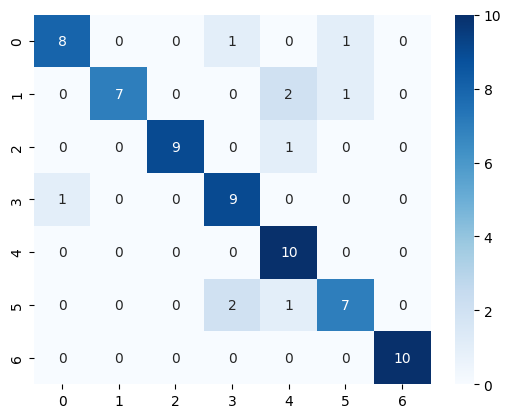

In [36]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

results = np.concatenate([(y, model.predict(x=x)) for x, y in validation_ds], axis=1)

labels = np.argmax(results[0], axis=1)
predictions = np.argmax(results[1], axis=1)

cf_matrix = confusion_matrix(labels, predictions)

sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")

#disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix)
#disp.plot()

print(classification_report(labels, predictions, digits = 4))

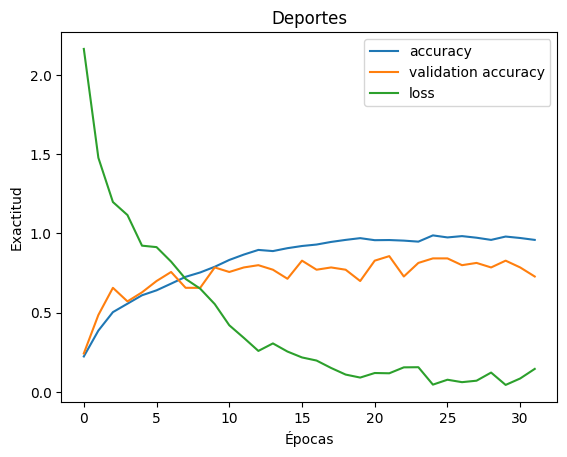

In [37]:
from matplotlib import pyplot as plt 

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.plot(history.history['loss'], label='loss')

plt.title('Deportes')

plt.xlabel('Épocas')
plt.ylabel('Exactitud')
plt.legend(loc="upper right")

plt.show()

(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
El vector de salida obtenido:  [[3.0701655e-10 7.5896500e-10 2.3277946e-11 1.8961919e-06 1.9082834e-11
  2.2191739e-10 9.9999809e-01]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
La etiqueta de salida predicha es  6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Ahora dicho con texto: La etiqueta de salida predicha es  swimming


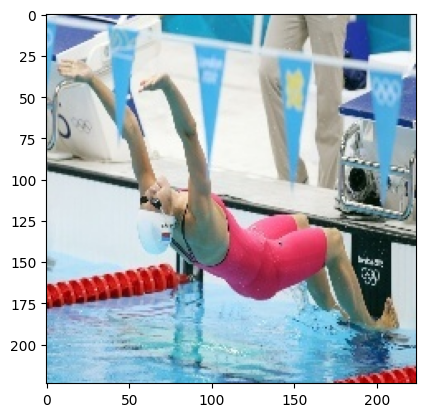

In [38]:
# PRODUCTION ----------------------------------------------

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
import tensorflow.keras

# LOADING --------------------------------------------------
#model = tensorflow.keras.models.load_model("mimodelo.h5")

#etiquetas=['banana', 'coconut', 'melon', 'orange', 'papaya', 'pineapple', 'pomelo','watermelon']
etiquetas=['baseball', 'football', 'formula 1 racing','judo','motorcycle racing','rugby','swimming']
%matplotlib inline

pil_im = Image.open('/kaggle/input/dataset-fsi-1/dataSetFSI/train/swimming/002.jpg', 'r')
im = np.asarray(pil_im.resize((224, 224)))
imshow(im)
print(im.shape) # La imagen es un array de dimensión: 224x224x3

# El método `predict` hace la predicción de un lote de entradas, no solo una. 
# En el caso de que tengamos solo una entrada deberemos añadirle una dimensión más 
# al array numpy para que la entrada tenga la dimensión: 1x224x224x3

im = im.reshape(1,224,224,3)


print('El vector de salida obtenido: ', model.predict(im))
print('La etiqueta de salida predicha es ', np.argmax(model.predict(im)))
print('Ahora dicho con texto: La etiqueta de salida predicha es ', etiquetas[np.argmax(model.predict(im))])






In [39]:
# PRODUCTION ----------------------------------------------
#from matplotlib.pyplot import imshow
import numpy as np
#from PIL import Image
import tensorflow.keras

# SAVING --------------------------------------------------
#model.save_model("mimodelo.h5")


# LOADING --------------------------------------------------
#model = tensorflow.keras.models.load_model("mimodelo.h5")


#etiquetas=['banana', 'coconut', 'melon', 'orange', 'papaya', 'pineapple', 'pomelo','watermelon']
etiquetas=['baseball', 'football', 'formula 1 racing','judo','motorcycle racing','rugby','swimming']
%matplotlib inline

print("ETIQUETA PREDICHA -> ETIQUETA REAL")

# Contadores para cálculo de precisión
total = 0
aciertos = 0

for minilote in test_ds:
    prediccion_minilote = model.predict(minilote[0].numpy())
    etiqueta_real_minilote = minilote[1].numpy()
    for y_predicha, y_real in zip(np.round(prediccion_minilote, 3), etiqueta_real_minilote):
        total += 1
        if np.argmax(y_predicha) == np.argmax(y_real):
            aciertos += 1
            print(etiquetas[np.argmax(y_predicha)], "->", etiquetas[np.argmax(y_real)])
        else:
            print(etiquetas[np.argmax(y_predicha)], "->", etiquetas[np.argmax(y_real)], "✘")

# Cálculo de la precisión
accuracy = (aciertos / total) * 100
print(f"\nAciertos: {aciertos}/{total}")
print(f"Precisión del modelo: {accuracy:.2f}%")

ETIQUETA PREDICHA -> ETIQUETA REAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
formula 1 racing -> formula 1 racing
motorcycle racing -> motorcycle racing
judo -> judo
motorcycle racing -> motorcycle racing
baseball -> baseball
motorcycle racing -> motorcycle racing
swimming -> swimming
judo -> judo
judo -> judo
judo -> judo
formula 1 racing -> formula 1 racing
rugby -> rugby
formula 1 racing -> formula 1 racing
judo -> judo
rugby -> rugby
motorcycle racing -> motorcycle racing
swimming -> swimming
rugby -> rugby
baseball -> baseball
formula 1 racing -> motorcycle racing ✘
baseball -> baseball
formula 1 racing -> formula 1 racing
motorcycle racing -> motorcycle racing
football -> baseball ✘
rugby -> rugby
baseball -> baseball
motorcycle racing -> motorcycle racing
football -> football
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
baseball -> baseball
motorcycle racing -> motorcycle racing
swimming -> swimming
formula 1 racing -> formula 1 racing
judo -> judo
rugby -> football ✘
baseball -> baseball
